<a href="https://colab.research.google.com/github/ValdemarBirkegaardPetersen/Image-Processing/blob/main/IP_HandIn_Valdemar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                          # for ARRAYSs
import pandas as pd                         # for data analysis and manipulation
import cv2                                  # for OpenCV
from google.colab.patches import cv2_imshow # for image display
from skimage import io                      # for algorithms for image processing
from PIL import Image                       # Python Image Language
import matplotlib.pylab as plt              # provides a MATLAB-like interface
import copy                                 # help COPYing
from google.colab import files              # Upload files to Colab
from io import BytesIO                      # Read / write 'files'

#DOWNLOAD THE PICTURES IM USING: https://imgur.com/a/VwaOMI1 
#DOWNLOAD THE PICTURES IM USING: https://imgur.com/a/VwaOMI1 

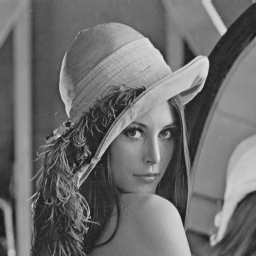

In [ ]:
#DOWNLOAD THE PICTURES IM USING: https://imgur.com/a/VwaOMI1 
#DOWNLOAD THE PICTURES IM USING: https://imgur.com/a/VwaOMI1 

imgBGR = io.imread("Lenna.png")
blueBGR = io.imread("blueball.jpg")

img256 = cv2.resize(imgBGR, (256,256), interpolation = cv2.INTER_AREA) 
img256 = cv2.cvtColor(img256, cv2.COLOR_BGR2RGB)
smallGray = cv2.resize(imgBGR,(256,256), interpolation = cv2.INTER_AREA)
smallGray = cv2.cvtColor(smallGray, cv2.COLOR_BGR2GRAY)

imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
blueRGB = cv2.cvtColor(blueBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2GRAY)

cv2_imshow(smallGray)

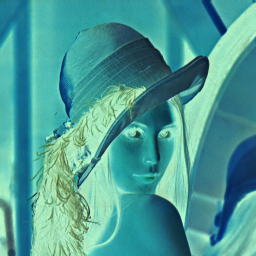

In [ ]:
#Invert 
invertImg = copy.copy(img256)

for i in range(invertImg.shape[0]):
  for j in range(invertImg.shape[1]):
    for c in range(invertImg.shape[2]):
      invertImg[i,j,c] = 255 - img256[i,j,c]

cv2_imshow(invertImg)

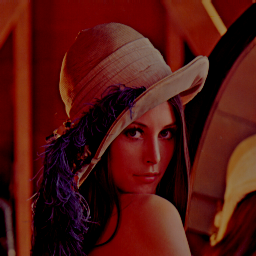

In [ ]:
#Simple Brightness
brightImg = copy.copy(img256)
val = -100

for i in range(brightImg.shape[0]):
  for j in range(brightImg.shape[1]):
    for c in range(brightImg.shape[2]):
      if(img256[i,j,c] > 255 - val):
        brightImg[i,j,c] = 255
      elif(img256[i,j,c] < -val):
        brightImg[i,j,c] = 0 
      else:
        brightImg[i,j,c] = img256[i,j,c] + val
    
cv2_imshow(brightImg)

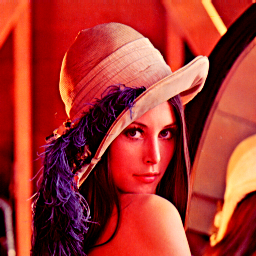

In [ ]:
#Contrast
cImg = copy.copy(img256)
new_image = np.zeros(cImg.shape, cImg.dtype)
alpha = 1.77
beta = -150

for i in range(cImg.shape[0]):
    for j in range(cImg.shape[1]):
        for c in range(cImg.shape[2]):
          new_image [i,j,c] = np.clip(alpha * cImg[i,j,c] + beta,0,255)

cv2_imshow(new_image)


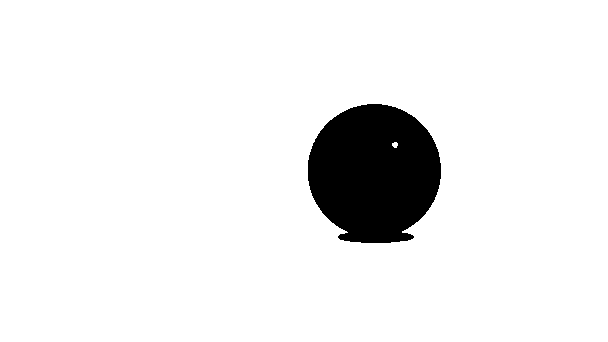

In [ ]:
#Threshold 
threshHold = cv2.cvtColor(blueRGB, cv2.COLOR_RGB2GRAY)

for i in range(threshHold.shape[0]):
  for j in range(threshHold.shape[1]):
    if(threshHold[i,j] < 218):
      threshHold[i,j] = 0 
    else:
      threshHold[i,j] = 255

cv2_imshow(threshHold)

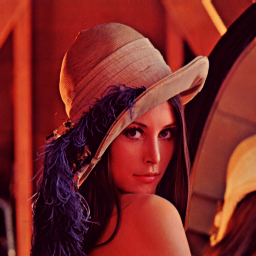

In [ ]:
#Gamma
gImg = copy.copy(img256)
gamma = 2.34

for i in range(gImg.shape[0]):
    for j in range(gImg.shape[1]):
        for c in range(gImg.shape[2]):
          gImg[i,j,c] = (img256[i,j,c]/255.0)**gamma * 255

cv2_imshow(gImg)



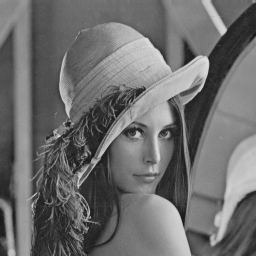

In [ ]:
#RGB to Greyscale

RG = copy.copy(img256)
resultImg = RG 
height, width, channels = RG.shape

for i in range(height):
  for j in range(width):
    resultImg[i,j] = 0.3 * RG[i,j][0] + 0.59 * RG[i,j][1] + 0.11 * RG[i,j][2]

cv2_imshow(resultImg)

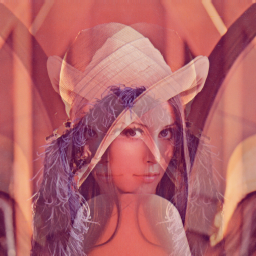

In [ ]:
#Alpha Blend: 
aImg = copy.copy(img256)
aImg2 = copy.copy(aImg)

hh = aImg2.shape[0]
ww = aImg2.shape[1]

alpha = 0.3

for i in range (hh):
    for j in range(ww):
        aImg2 [i,j] = aImg [i,j] * (1 - alpha) + aImg[i,ww-j-1] * alpha;

cv2_imshow(aImg2)

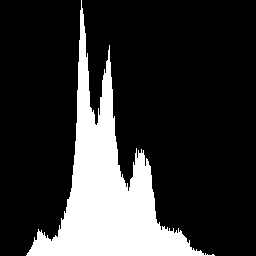

In [ ]:
#Histogram

hImg = copy.copy(smallGray)

hist = np.zeros(hImg.shape[0])

for i in range(hImg.shape[0]):
  for j in range(hImg.shape[1]):
    hist[imgGray[i,j]] += 1

max = 0 

for i in range(hist.shape[0]):
  if(hist[i] > max):
    max = hist[i]

histogram = np.zeros((256,256,1),np.uint8) 

for x in range(256):
  for y in range(int(hist[x] * 256/max)):
    histogram[255-y,x] = 255

cv2_imshow(histogram)

In [ ]:
#Histogram Stechting 

strech = copy.copy(imgGray)

max = 0 
min = 255

for i in range(imgGray.shape[0]):
  for j in range(imgGray.shape[1]):
    if(imgGray[i,j] > max):
      max = imgGray[i,j]
    if(imgGray[i,j] < min):
      min = imgGray[i,j]

print(max,min)
print(imgGray.shape[0],imgGray.shape[1])
hsImg = np.zeros((256,256,1), np.uint8)

for i in range(imgGray.shape[0]):
  for j in range(imgGray.shape[1]):
    hsImg[i,j] = ( imgGray[i,j] - min )/ (max-min) * 255

twoImgs = cv2.hconcat((imgGray,hsImg))
cv2_imshow(twoImgs)

hist1 = np.zeros(256)

for i in range(hsImg.shape[0]):
  for j in range(hsImg.shape[1]):
    hist2[hsImg[i,j]] += 1

hist2 = np.ones((256,256,1),np.uint8)*255

for x in range(256):
  for y in range(int(hist1[x] * 256/hmax)):
    hist2[255-y,x] = 0

twoImgs = cv2.hconcat((hist1,hist2))
cv2_imshow(twoImgs)



In [ ]:
#Background Substraction

maxD = 215

castle = cv2.imread("Castle.jpg")
wick = cv2.imread("wick2.png")

diff = np.zeros((castle.shape[0],castle.shape[1],1),np.uint8)
segmented = np.zeros((castle.shape[0],castle.shape[1],1),np.uint8)

for i in range(wick.shape[0]):
  for j in range(wick.shape[1]):
    diff[i,j] = (abs(wick[i,j,0]-castle[i,j,0])+abs(wick[i,j,1]-castle[i,j,1])+abs(wick[i,j,2]-castle[i,j,2]))
    if(diff[i,j] > maxD):
      segmented[i,j] = 255

cv2_imshow(segmented)

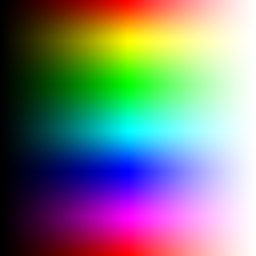

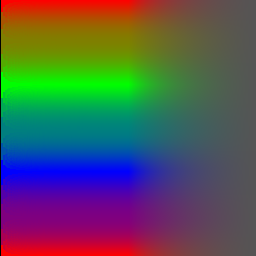

In [ ]:
#Normalized RGB
url = ["https://aleeodom.files.wordpress.com/2010/10/gradient.png"]
before = io.imread(url[0])
normalRGB = cv2.resize(before, (256,256), interpolation = cv2.INTER_AREA) 
gradient = cv2.cvtColor(normalRGB, cv2.COLOR_BGR2RGB)

cv2_imshow(gradient)

normal = np.zeros(gradient.shape,np.uint8)

for i in range(gradient.shape[0]):
  for j in range(gradient.shape[1]):
    sum = 0.001 + gradient[i,j,0] + gradient[i,j,1] + gradient[i,j,2]
    for c in range(gradient.shape[2]):
      normal[i,j,c] = gradient[i,j,c] / sum * 255


cv2_imshow(normal)

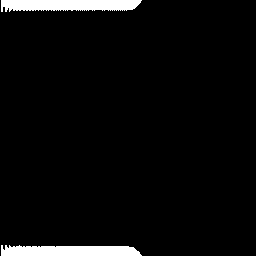

In [ ]:
#Color Detection

Yellow = np.zeros(gradient.shape,np.uint8)

for i in range(gradient.shape[0]):
  for j in range(gradient.shape[1]):
    if(normal[i,j,0] < 44 and normal[i,j,1] < 44 and normal[i,j,2] > 200):
      Yellow[i,j] = 255

cv2_imshow(Yellow)